<a href="https://colab.research.google.com/github/cailyn-craven/TensorFlow_2.0_Practical/blob/master/Project_1_Temp_Conversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow-gpu==2.0.0.alpha0
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

     |████████████████████████████████| 332.1MB 48kB/s 
     |████████████████████████████████| 3.0MB 49.2MB/s 
     |████████████████████████████████| 419kB 61.0MB/s 


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

Step 1: Import Datasets

In [0]:
# You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# You have to include the full link to the csv file containing your dataset
Temperature_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Celsius-to-Fahrenheit.csv')

In [0]:
Temperature_df.head(5)

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [0]:
Temperature_df.reset_index(drop=True, inplace=True)
Temperature_df.head(5)

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [0]:
Temperature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
Celsius       30 non-null int64
Fahrenheit    30 non-null float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [0]:
Temperature_df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


Step 2: Visualize the Dataset 

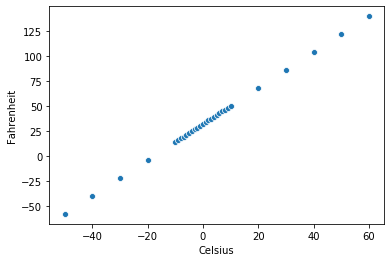

In [0]:
sns.scatterplot(Temperature_df['Celsius'], Temperature_df['Fahrenheit'])

Step 3: Create Testing and Training Dataset 

In [0]:
X_train = Temperature_df['Celsius']
Y_train = Temperature_df['Fahrenheit']


Step 4: Build and Train the Model 

In [0]:
X_train.shape

(30,)

In [0]:
Y_train.shape

(30,)

In [0]:
model = tf.keras.Sequential()
# units is the number of neurons 
model.add(tf.keras.layers.Dense(units=1, input_shape=[1]))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(1), loss='mean_squared_error')

In [0]:
epochs_hist = model.fit(X_train, Y_train, epochs = 500)



Epoch 1/500
30/30 [==============================] - 1s 44ms/sample - loss: 2382.1121
Epoch 2/500
30/30 [==============================] - 0s 184us/sample - loss: 1160.3438
Epoch 3/500
30/30 [==============================] - 0s 110us/sample - loss: 926.8989
Epoch 4/500
30/30 [==============================] - 0s 116us/sample - loss: 1203.6981
Epoch 5/500
30/30 [==============================] - 0s 109us/sample - loss: 1329.5717
Epoch 6/500
30/30 [==============================] - 0s 136us/sample - loss: 1163.8555
Epoch 7/500
30/30 [==============================] - 0s 130us/sample - loss: 882.3962
Epoch 8/500
30/30 [==============================] - 0s 168us/sample - loss: 661.6572
Epoch 9/500
30/30 [==============================] - 0s 161us/sample - loss: 584.9442
Epoch 10/500
30/30 [==============================] - 0s 94us/sample - loss: 625.7601
Epoch 11/500
30/30 [==============================] - 0s 84us/sample - loss: 686.1569
Epoch 12/500
30/30 [==============================

Step 5: Evaluate the Model 

In [0]:
epochs_hist.history.keys()

dict_keys(['loss'])

With epochs_hist.histor.keys(), we store the loss values associated with each epoch in a dictionary. Then we can use Matplotlib to visualize the loss. Here we used the basic Matplotlib functional style to create a plot instead of the object oriented method where we create a figure object and then call methods or attributes off of that object. With the graph, we can see that the error reaches a plateau after about 75 to 100 epochs. This means that we don’t need to use all of that computational power of doing 500 epochs. We can stop after 75 to 100 epochs. 

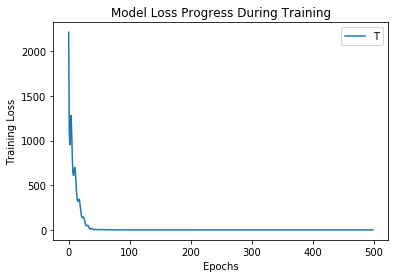

In [0]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend('Traing Loss')

In [0]:
model.get_weights()

[array([[1.8]], dtype=float32), array([32.], dtype=float32)]

We use model.get_weights() to retrieve the weights. The model had a weight of 1.8 and a bias of 32. These numbers are the coefficients of our equation. 9/5 is 1.8. Using just input and output data, the model figured out the equation for converting Celsius temperatures to Fahrenheit. We perform a feed forward pass so the model uses the temperature in Celsius and comes up with a prediction. 

In [29]:
Temp_C = 60
Temp_F = model.predict([Temp_C])
print('Temperature in DegF Using ANN=', Temp_F)

Temperature in DegF Using ANN= [[140.]]


In [30]:
# Let's confirm with the equation
Temp_F = 9/5 * Temp_C + 32
print('Temperature in DegF Using Equation=',Temp_F)

Temperature in DegF Using Equation= 140.0
